In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def std_1(data):
    data = data.copy()
    cols = data.columns
    data[cols] /= max(data.max())
    return data

In [3]:
def std_2(data):
    data = data.copy()
    cols = data.columns
    data[cols] = (data[cols] - data.mean()) / (max(data.max()) - min(data.min()))
    return data

In [4]:
def std_3(data):
    data = data.copy()
    cols = data.columns
    data[cols] = (data[cols] - data.mean()) / np.sqrt(data.var())
    return data

In [5]:
def read_df(path):
    with open(path, 'r') as f:
        data = [list(map(float, (row.strip().split(',')))) for row in f.readlines()]
    return pd.DataFrame(data, columns=[f'Col {i}' for i in range(len(data[0]))])

In [6]:
df = read_df(os.path.join(os.getcwd(), 'dt2.txt')).drop(['Col 2'], axis=1)
df.head()

,Col 0,Col 1
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0


In [7]:
res = pd.concat(
    [
        df.describe().T,
        std_1(df).describe().T,
        std_2(df).describe().T,
        std_3(df).describe().T
    ],
    axis=0
)

res.index = [
    'Col(0)(orig)', 'Col(1)(orig)',
    'Col(0) std_1(max)', 'Col(1) std_1(max)',
    'Col(0) std_2(mean-quant)', 'Col(1) std_2(mean-quant)',
    'Col(0) std_3(standard)', 'Col(1) std_3(standard)'
]

res

,count,mean,std,min,25%,50%,75%,max
Col(0)(orig),47.0,2.000681e+03,794.702354,852.000000,1432.000000,1888.000000,2269.000000,4478.000000
Col(1)(orig),47.0,3.170213e+00,0.760982,1.000000,3.000000,3.000000,4.000000,5.000000
Col(0) std_1(max),47.0,4.467800e-01,0.177468,0.190264,0.319786,0.421617,0.506699,1.000000
Col(1) std_1(max),47.0,7.079528e-04,0.000170,0.000223,0.000670,0.000670,0.000893,0.001117
Col(0) std_2(mean-quant),47.0,1.240143e-17,0.177508,-0.256574,-0.127023,-0.025169,0.059933,0.553344
Col(1) std_2(mean-quant),47.0,4.469450e-20,0.000170,-0.000485,-0.000038,-0.000038,0.000185,0.000409
Col(0) std_3(standard),47.0,3.779483e-17,1.000000,-1.445423,-0.715590,-0.141790,0.337635,3.117292
Col(1) std_3(standard),47.0,2.746030e-16,1.000000,-2.851859,-0.223675,-0.223675,1.090417,2.404508


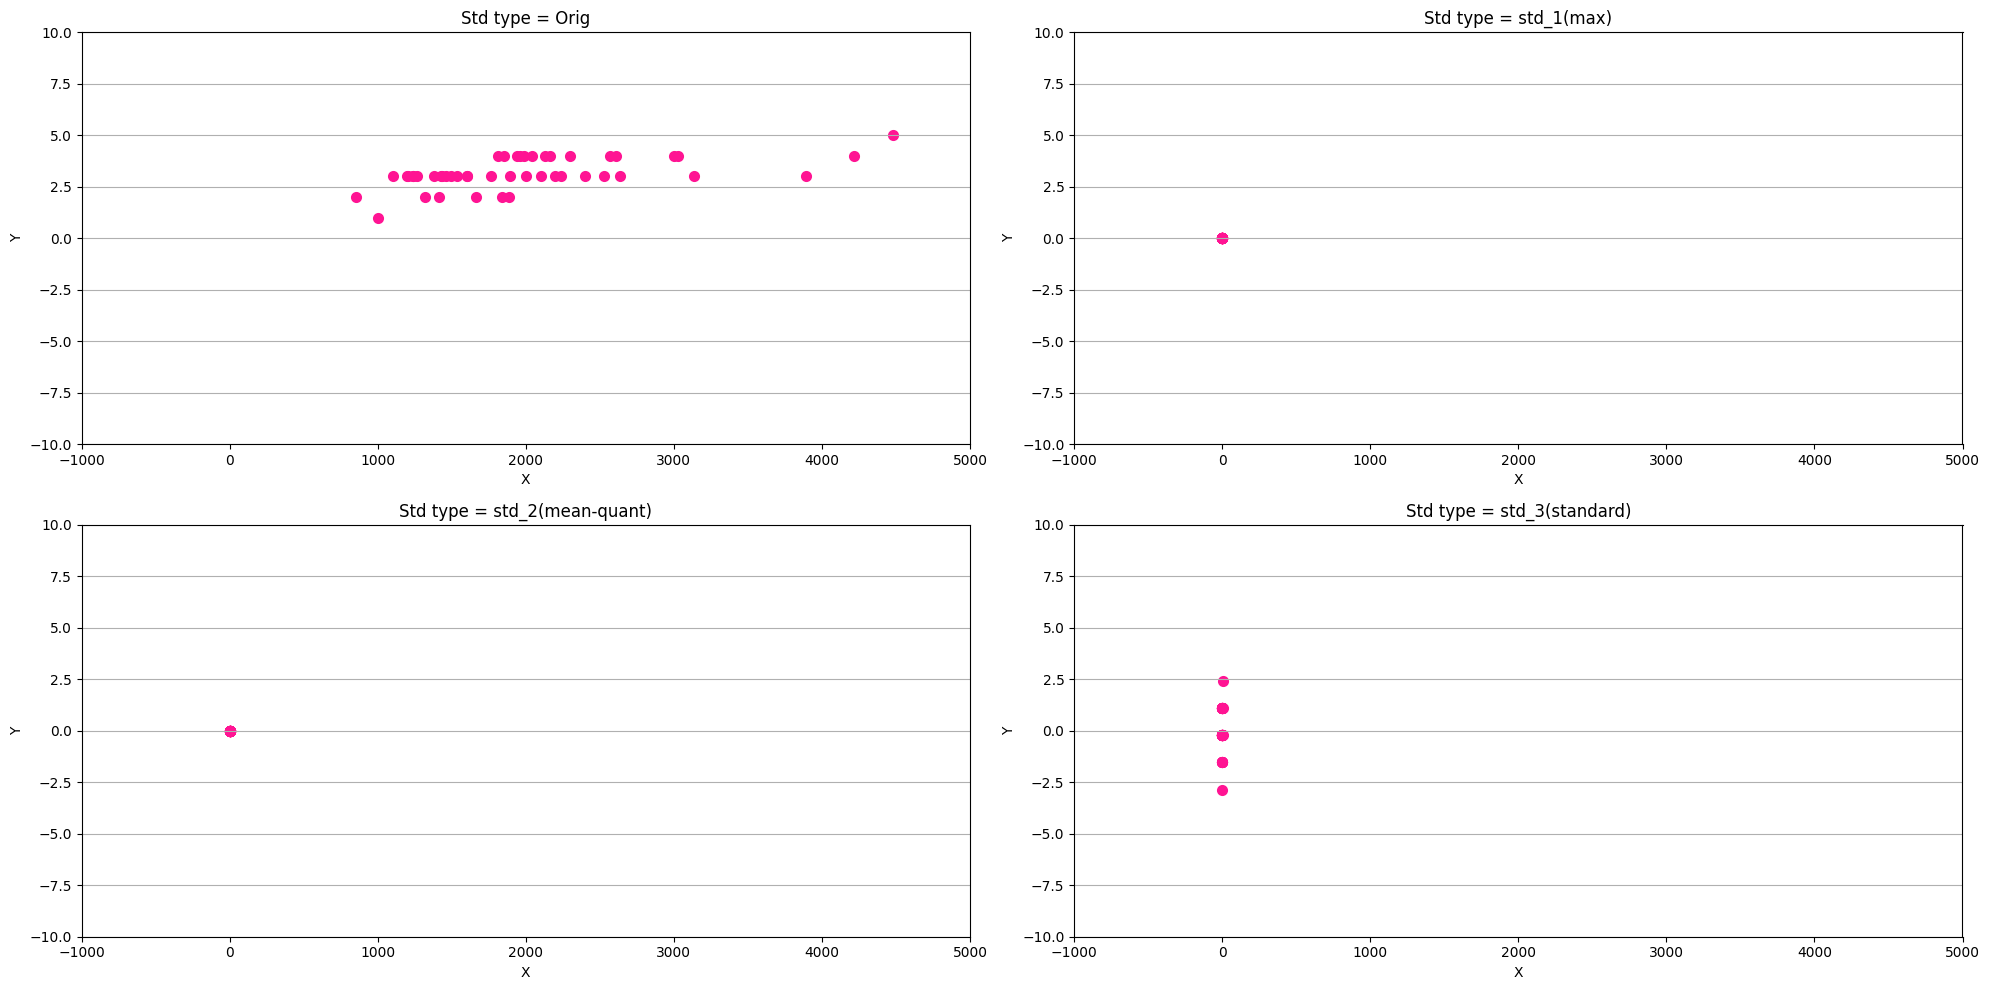

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.ravel()  # преобразуем в плоский массив для удобства

data = [
    (df, 'Orig'),
    (std_1(df), 'std_1(max)'),
    (std_2(df), 'std_2(mean-quant)'),
    (std_3(df), 'std_3(standard)')
]

col_1, col_2 = 'Col 0', 'Col 1'

for dt, ax_i in zip(data, ax):
    
    ax_i.scatter(dt[0][col_1], dt[0][col_2], color='deeppink', lw=2)

    ax_i.set_xlim([-1000, 5000])
    ax_i.set_ylim([-10, 10])
    
    ax_i.set_xlabel('X')
    ax_i.set_ylabel('Y')
    ax_i.set_title(f'Std type = {dt[1]}')
    ax_i.grid(True, axis='y')

plt.tight_layout()
plt.show()